## Simple classification 
## - binary classification

In [2]:
# modules/libraries:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load/read and set initial dataset:
h = pd.read_csv("heart.csv")
h.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# checking null values:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


29
77


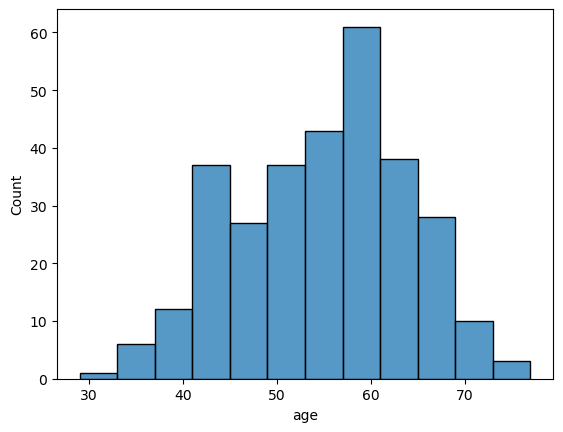

In [5]:
# visualize age:
sns.histplot(data = h["age"])
print(h["age"].min())
print(h["age"].max())

In [6]:
# transform age as bins:
bin_age = [29, 39, 49, 59, 69, 77]
category_age = ["29-39",
                "40-49",
                "50-59",
                "60-69",
                ">=70"]
h["age_binned"] = (
    pd.cut(h["age"],
           bins = bin_age,
           labels = category_age))
h = h.drop(["age"], axis = 1)
h.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,age_binned
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,60-69
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,29-39
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,40-49
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,50-59
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,50-59


In [7]:
# binding:
age = pd.get_dummies(h["age_binned"])
h = h.drop(columns = ["age_binned"])
h = pd.concat([h, age], axis = 1)
h.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,29-39,40-49,50-59,60-69,>=70
0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0
1,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,0,0
2,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0
3,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,0,1,0,0
4,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,1,0,0


<AxesSubplot: >

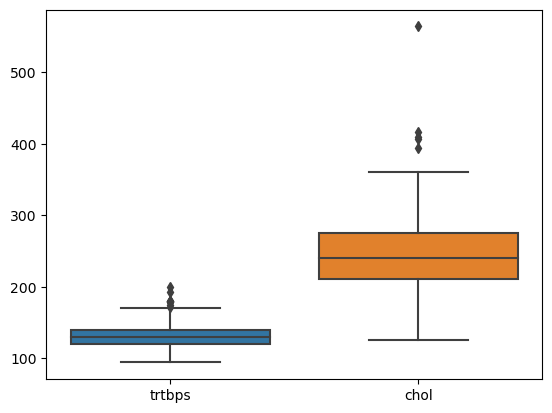

In [8]:
# checking outliners:
sns.boxplot(data = h.iloc[:, [2,3]])

In [9]:
# import for outliners:
from scipy.stats import boxcox

# function for transformation:
def outliners(col):
    h[col], _ = boxcox(h[col] + 1e-5)
    
# apply the function:
cols = ["trtbps", "chol"]
for x in cols:
    outliners(x)

# check:
h.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,29-39,40-49,50-59,60-69,>=70
0,1,3,1.390124,4.141081,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0
1,1,2,1.386588,4.180466,0,1,187,0,3.5,0,0,2,1,1,0,0,0,0
2,0,1,1.386588,4.065939,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0
3,1,1,1.383820,4.148258,0,1,178,0,0.8,2,0,2,1,0,0,1,0,0
4,0,0,1.383820,4.370747,0,1,163,1,0.6,2,0,2,1,0,0,1,0,0


In [10]:
# round values:
h["trtbps"] = np.round(h["trtbps"], 2)
h["chol"] = np.round(h["chol"], 2)
h.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,29-39,40-49,50-59,60-69,>=70
0,1,3,1.39,4.14,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0
1,1,2,1.39,4.18,0,1,187,0,3.5,0,0,2,1,1,0,0,0,0
2,0,1,1.39,4.07,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0
3,1,1,1.38,4.15,0,1,178,0,0.8,2,0,2,1,0,0,1,0,0
4,0,0,1.38,4.37,0,1,163,1,0.6,2,0,2,1,0,0,1,0,0


In [11]:
# rearange columns:
colss = h.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,12]]
colss = colss.columns.to_list()
h = h.reindex(columns = colss)
h.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,29-39,40-49,50-59,60-69,>=70,output
0,1,3,1.39,4.14,1,0,150,0,2.3,0,0,1,0,0,0,1,0,1
1,1,2,1.39,4.18,0,1,187,0,3.5,0,0,2,1,0,0,0,0,1
2,0,1,1.39,4.07,0,0,172,0,1.4,2,0,2,0,1,0,0,0,1
3,1,1,1.38,4.15,0,1,178,0,0.8,2,0,2,0,0,1,0,0,1
4,0,0,1.38,4.37,0,1,163,1,0.6,2,0,2,0,0,1,0,0,1


In [12]:
# corr
coor_matrix = h.corr()
target = coor_matrix["output"].drop("output")
target

sex        -0.280937
cp          0.433798
trtbps     -0.109844
chol       -0.092212
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
29-39       0.086510
40-49       0.168033
50-59      -0.041318
60-69      -0.173854
>=70        0.020568
Name: output, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# setup:
X = h.iloc[:, :-1]
y = h[["output"]]

# split the data:
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size = 0.3, random_state = 5))

In [14]:
# scaling:
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

## Naive Bayes:

In [15]:
from sklearn.naive_bayes import GaussianNB

# train:
nbm = GaussianNB()
nbm.fit(X_norm_train, y_train)

# prediction:
y_predict_nb = nbm.predict(X_norm_test)

# classification report:
print(classification_report(y_test, y_predict_nb))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        43
           1       0.84      0.90      0.87        48

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91



C:\Users\A427443\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# fit the model:
lr_model = LogisticRegression()
lr_model.fit(X_norm_train, y_train)

C:\Users\A427443\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
# prediction:
y_predict = lr_model.predict(X_norm_test)

In [18]:
# final score:
score = np.round(lr_model.score(X_norm_test, y_test), 2) * 100
print("Accuracy on training set:", score)

Accuracy on training set: 91.0


In [19]:
# classification report:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.88      0.96      0.92        48

    accuracy                           0.91        91
   macro avg       0.92      0.91      0.91        91
weighted avg       0.91      0.91      0.91        91



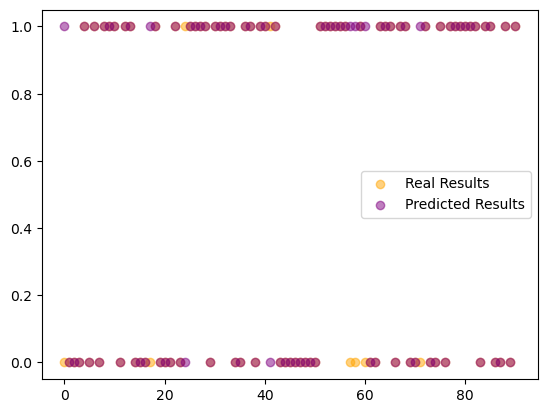

In [20]:
# final viz test:
real_results = y_test.iloc[:, -1].values
predicted_results = y_predict.ravel()

plt.scatter(range(len(real_results)),
            real_results, marker = "o",
            c = "orange",
            alpha = 0.5,
            label = 'Real Results')

plt.scatter(range(len(predicted_results)),
            predicted_results,
            marker = "o",
            c = "purple",
            alpha = 0.5,
            label = "Predicted Results")
plt.legend()
plt.show()